In [163]:
import pandas as pd

In [164]:
data = pd.read_csv('training_data.csv')

C:\Users\yash0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [165]:
data.head()

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B


In [166]:
data.columns

Index(['financial_active', 'net_payment_behaviour_tripd', 'promotion_flag',
       'variable_rate_index', 'account_status_code', 'active_12_mths',
       'bank_fico_buckets_20', 'charge_off_reason_code', 'mob',
       'open_closed_flag', 'ever_delinquent_flg', 'nbr_mths_due',
       'variable_rate_margin', 'stmt_balance', 'prev_balance', 'net_sales',
       'net_payments', 'purchase_active', 'credit_limit_amt',
       'credit_limit_pa', 'closed', 'active', 'charge_off', 'charge_off_aged',
       'charge_off_bk', 'principal_amt', 'principal_amt_chrg_off',
       'total_writeoff_amt', 'fee_chg_off_reversal_amt', 'net_finance_charge',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'aged_writeoff_amt',
       'bankruptcy_writeoff_amt', 'fc_reversals', 'fee_reversals',
       'fraud_writeoff_amt', 'other_writeoff_amt', 'promo_bal_amt',
       'recovery_amt', 'writeoff_type_bko', 'writeoff_type_fraud_kiting',
       'writeoff_type_fraud_s

In [126]:
data.dtypes

financial_active               float64
net_payment_behaviour_tripd     object
promotion_flag                   int64
variable_rate_index              int64
account_status_code             object
                                ...   
due_balance_7                  float64
due_balance_8                  float64
snapshot                         int64
mth_code                         int64
industry                        object
Length: 69, dtype: object

In [127]:
# data['Date'] = pd.to_datetime(data['mth_code'],format='%Y%m')
data['Date'] = pd.to_datetime(data['mth_code'].astype(str), format='%Y%m')

In [128]:
data['Date']

0         2018-07-01
1         2019-06-01
2         2019-05-01
3         2018-06-01
4         2019-02-01
             ...    
5758218   2019-12-01
5758219   2019-12-01
5758220   2019-12-01
5758221   2019-12-01
5758222   2019-12-01
Name: Date, Length: 5758223, dtype: datetime64[ns]

Macro

In [293]:
macro_old = pd.read_csv('macro_data.csv', skiprows=4)
macro_old.head()

,Native Frequency,MONTHLY,MONTHLY.1,MONTHLY.2,MONTHLY.3,MONTHLY.4,ANNUAL,MONTHLY.5,MONTHLY.6,MONTHLY.7,...,MONTHLY.84,MONTHLY.85,MONTHLY.86,MONTHLY.87,MONTHLY.88,MONTHLY.89,MONTHLY.90,MONTHLY.91,MONTHLY.92,MONTHLY.93
0,Geography,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
1,Last Updated,10/11/2022,10/11/2022,10/11/2022,10/11/2022,10/11/2022,10/10/2022,10/11/2022,10/11/2022,10/11/2022,...,6/9/2020,6/9/2020,6/9/2020,6/9/2020,6/9/2020,6/9/2020,6/9/2020,6/9/2020,2/8/2020,2/8/2020
2,Historical End Date,7/31/2022,8/31/2022,8/31/2022,8/31/2022,8/31/2022,12/31/2020,6/30/2022,6/30/2020,3/31/2022,...,12/31/2019,5/31/2020,4/30/2019,4/30/2020,5/31/2020,5/31/2020,9/30/2018,3/31/2020,9/30/2019,9/30/2019
3,1/31/2000,136.3844706,5715.426,2921.232,5,6542.87,29747.16297,9914.297967,79259.05028,51147.36716,...,4.562116475,110.434,78.90000153,8450.176371,1.3286,131.7539368,8.074702332,67.06213805,481.3313416,654.1137534
4,2/29/2000,136.1759165,5754.412,2965.596,4.5,6625.259,29943.16651,9989.058091,79784.01732,51287.26889,...,4.531454504,110.525,78.90000153,8531.737106,1.41475,140.055069,8.189753202,67.09304827,484.6490423,654.7960535


In [294]:
macro = macro_old.drop(['ANNUAL', 'QUARTERLY'], axis=1).rename(columns={'Native Frequency' : 'mth_code'})
macro = macro.loc[219:266]
macro.head()

,mth_code,MONTHLY,MONTHLY.1,MONTHLY.2,MONTHLY.3,MONTHLY.4,MONTHLY.5,MONTHLY.6,MONTHLY.7,MONTHLY.8,...,MONTHLY.84,MONTHLY.85,MONTHLY.86,MONTHLY.87,MONTHLY.88,MONTHLY.89,MONTHLY.90,MONTHLY.91,MONTHLY.92,MONTHLY.93
219,1/31/2018,248.873161,10761.294,5181.42,7.1,13628.374,20073.62463,138178.1894,75120.61132,1033238.96,...,3.664279275,125.317,79.5,12775.504,2.6712,253.46,4.058025114,64.18299722,782.9992665,616.3053138
220,2/28/2018,250.8678133,10780.022,5215.572,7.2,13668.318,20141.45839,138578.5727,75283.48447,941822.3073,...,3.65003925,125.672,79.3,12765.158,2.70475,256.9375,4.206673162,64.29943946,783.2181714,611.3780129
221,3/31/2018,251.6692577,10808.394,5198.868,7.2,13735.355,20251.37579,139015.1391,75437.82054,944446.3205,...,3.635682638,125.85,79.2,12808.044,2.709,255.9775,4.374298511,64.41750914,784.8495621,608.5116733
222,4/30/2018,252.3962837,10850.006,5220.732,7.2,13792.129,20361.7524,139415.5111,75597.31004,966424.254,...,3.627843586,125.977,79.2,12863.202,2.8732,272.104,4.530713379,64.50872796,787.5053156,607.2579171
223,5/31/2018,253.7272947,10884.605,5277.108,7.2,13860.171,20482.75073,139951.8411,75770.1069,955945.667,...,3.634637848,126.238,78.9,12918.212,2.98675,290.12,4.625637301,64.52811155,789.9358207,606.4957157


In [295]:
macro['mth_code'] = pd.to_datetime(macro['mth_code'])#.apply(lambda x: x.replace(tzinfo=None))#.dt.strftime('%Y%m%d')
macro.head()

,mth_code,MONTHLY,MONTHLY.1,MONTHLY.2,MONTHLY.3,MONTHLY.4,MONTHLY.5,MONTHLY.6,MONTHLY.7,MONTHLY.8,...,MONTHLY.84,MONTHLY.85,MONTHLY.86,MONTHLY.87,MONTHLY.88,MONTHLY.89,MONTHLY.90,MONTHLY.91,MONTHLY.92,MONTHLY.93
219,2018-01-31,248.873161,10761.294,5181.42,7.1,13628.374,20073.62463,138178.1894,75120.61132,1033238.96,...,3.664279275,125.317,79.5,12775.504,2.6712,253.46,4.058025114,64.18299722,782.9992665,616.3053138
220,2018-02-28,250.8678133,10780.022,5215.572,7.2,13668.318,20141.45839,138578.5727,75283.48447,941822.3073,...,3.65003925,125.672,79.3,12765.158,2.70475,256.9375,4.206673162,64.29943946,783.2181714,611.3780129
221,2018-03-31,251.6692577,10808.394,5198.868,7.2,13735.355,20251.37579,139015.1391,75437.82054,944446.3205,...,3.635682638,125.85,79.2,12808.044,2.709,255.9775,4.374298511,64.41750914,784.8495621,608.5116733
222,2018-04-30,252.3962837,10850.006,5220.732,7.2,13792.129,20361.7524,139415.5111,75597.31004,966424.254,...,3.627843586,125.977,79.2,12863.202,2.8732,272.104,4.530713379,64.50872796,787.5053156,607.2579171
223,2018-05-31,253.7272947,10884.605,5277.108,7.2,13860.171,20482.75073,139951.8411,75770.1069,955945.667,...,3.634637848,126.238,78.9,12918.212,2.98675,290.12,4.625637301,64.52811155,789.9358207,606.4957157


In [283]:
# macro.to_excel(r'C:\Users\yash0\Desktop\Datathon\macro_dates.xlsx')

In [296]:
macro.iloc[:, 1:] = macro.iloc[:,1:].astype(float)
macro.head()

,mth_code,MONTHLY,MONTHLY.1,MONTHLY.2,MONTHLY.3,MONTHLY.4,MONTHLY.5,MONTHLY.6,MONTHLY.7,MONTHLY.8,...,MONTHLY.84,MONTHLY.85,MONTHLY.86,MONTHLY.87,MONTHLY.88,MONTHLY.89,MONTHLY.90,MONTHLY.91,MONTHLY.92,MONTHLY.93
219,2018-01-31,248.873161,10761.294,5181.420,7.1,13628.374,20073.62463,138178.1894,75120.61132,1.033239e+06,...,3.664279,125.317,79.5,12775.504,2.67120,253.4600,4.058025,64.182997,782.999266,616.305314
220,2018-02-28,250.867813,10780.022,5215.572,7.2,13668.318,20141.45839,138578.5727,75283.48447,9.418223e+05,...,3.650039,125.672,79.3,12765.158,2.70475,256.9375,4.206673,64.299439,783.218171,611.378013
221,2018-03-31,251.669258,10808.394,5198.868,7.2,13735.355,20251.37579,139015.1391,75437.82054,9.444463e+05,...,3.635683,125.850,79.2,12808.044,2.70900,255.9775,4.374299,64.417509,784.849562,608.511673
222,2018-04-30,252.396284,10850.006,5220.732,7.2,13792.129,20361.75240,139415.5111,75597.31004,9.664243e+05,...,3.627844,125.977,79.2,12863.202,2.87320,272.1040,4.530713,64.508728,787.505316,607.257917
223,2018-05-31,253.727295,10884.605,5277.108,7.2,13860.171,20482.75073,139951.8411,75770.10690,9.559457e+05,...,3.634638,126.238,78.9,12918.212,2.98675,290.1200,4.625637,64.528112,789.935821,606.495716


In [297]:
macro.dtypes

mth_code      datetime64[ns]
MONTHLY              float64
MONTHLY.1            float64
MONTHLY.2            float64
MONTHLY.3            float64
                   ...      
MONTHLY.89           float64
MONTHLY.90           float64
MONTHLY.91           float64
MONTHLY.92           float64
MONTHLY.93           float64
Length: 95, dtype: object

In [298]:
macro.to_excel(r'C:\Users\yash0\Desktop\Datathon\macro_dates.xlsx')

In [299]:
cor = macro.corr()
cor2 = cor[cor>0.5]
cor2

,MONTHLY,MONTHLY.1,MONTHLY.2,MONTHLY.3,MONTHLY.4,MONTHLY.5,MONTHLY.6,MONTHLY.7,MONTHLY.8,MONTHLY.9,...,MONTHLY.84,MONTHLY.85,MONTHLY.86,MONTHLY.87,MONTHLY.88,MONTHLY.89,MONTHLY.90,MONTHLY.91,MONTHLY.92,MONTHLY.93
MONTHLY,1.000000,0.951800,0.928576,NaN,0.858203,0.878198,0.818208,0.926180,NaN,0.844674,...,0.791596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965953,0.778056
MONTHLY.1,0.951800,1.000000,0.918797,NaN,0.937697,0.961422,0.709064,0.902802,NaN,0.744539,...,0.713828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882983,0.638071
MONTHLY.2,0.928576,0.918797,1.000000,NaN,0.938037,0.925030,0.753989,0.817295,NaN,0.778079,...,0.811437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.867272,0.710835
MONTHLY.3,NaN,NaN,NaN,1.0,NaN,NaN,0.619814,NaN,0.842143,0.585455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTHLY.4,0.858203,0.937697,0.938037,NaN,1.000000,0.992727,0.578564,0.742787,NaN,0.614546,...,0.634637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741471,0.559884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MONTHLY.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.74947,0.664761,0.509635,0.996693,1.0,NaN,NaN,NaN,NaN
MONTHLY.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.813974,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MONTHLY.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
MONTHLY.92,0.965953,0.882983,0.867272,NaN,0.741471,0.766916,0.857257,0.929300,NaN,0.876304,...,0.826173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.843574


<AxesSubplot:>

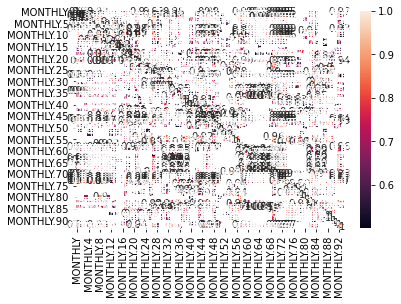

In [300]:
import seaborn as sns
sns.heatmap(cor2, annot=True)

In [301]:
def find_correlation(df, thresh=0.75):        
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)


    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [302]:
find_correlation(macro)

['MONTHLY.2',
 'MONTHLY.4',
 'MONTHLY.5',
 'MONTHLY.6',
 'MONTHLY.7',
 'MONTHLY.9',
 'MONTHLY.10',
 'MONTHLY.21',
 'MONTHLY.27',
 'MONTHLY.33',
 'MONTHLY.34',
 'MONTHLY.36',
 'MONTHLY.45',
 'MONTHLY.46',
 'MONTHLY.47',
 'MONTHLY.58',
 'MONTHLY.60',
 'MONTHLY.63',
 'MONTHLY.64',
 'MONTHLY.65',
 'MONTHLY.67',
 'MONTHLY.68',
 'MONTHLY.70',
 'MONTHLY.71',
 'MONTHLY.72',
 'MONTHLY.73',
 'MONTHLY.82',
 'MONTHLY.84',
 'MONTHLY.92',
 'MONTHLY.93',
 'MONTHLY',
 'MONTHLY.11',
 'MONTHLY.13',
 'MONTHLY.40',
 'MONTHLY.57',
 'MONTHLY.3',
 'MONTHLY.15',
 'MONTHLY.29',
 'MONTHLY.12',
 'MONTHLY.42',
 'MONTHLY.45',
 'MONTHLY.46',
 'MONTHLY.47',
 'MONTHLY.49',
 'MONTHLY.16',
 'MONTHLY.43',
 'MONTHLY.48',
 'MONTHLY.55',
 'MONTHLY.75',
 'MONTHLY.79',
 'MONTHLY.83',
 'MONTHLY.85',
 'MONTHLY.17',
 'MONTHLY.22',
 'MONTHLY.23',
 'MONTHLY.24',
 'MONTHLY.25',
 'MONTHLY.29',
 'MONTHLY.32',
 'MONTHLY.69',
 'MONTHLY.85',
 'MONTHLY.87',
 'MONTHLY.19',
 'MONTHLY.37',
 'MONTHLY.43',
 'MONTHLY.48',
 'MONTHLY.54',
 'MON

In [245]:
macro = macro.drop(find_correlation(macro), axis = 1)

In [246]:
macro.head()

,mth_code,MONTHLY.1,MONTHLY.8,MONTHLY.14,MONTHLY.18,MONTHLY.20,MONTHLY.26,MONTHLY.28,MONTHLY.39,MONTHLY.41,MONTHLY.50,MONTHLY.52,MONTHLY.80,MONTHLY.81,MONTHLY.90,MONTHLY.91
219,2018-01-31,10761.294,1.033239e+06,9.772692,2808.21485,4721.424,147.672,2.392,2.583810,33.6,207.32,0.622,0.415719,-9.924650,4.058025,64.182997
220,2018-02-28,10780.022,9.418223e+05,9.727890,2820.09682,4758.228,148.078,2.327,2.858947,33.8,208.87,0.637,1.273650,-9.938967,4.206673,64.299439
221,2018-03-31,10808.394,9.444463e+05,9.709184,2831.77412,4751.832,148.254,2.222,2.842381,33.7,209.68,0.662,1.355138,-10.136378,4.374299,64.417509
222,2018-04-30,10850.006,9.664243e+05,9.707564,2842.38123,4761.924,148.391,2.343,2.869048,33.8,210.31,0.637,1.245950,-10.582066,4.530713,64.508728
223,2018-05-31,10884.605,9.559457e+05,9.707665,2856.79584,4832.124,148.669,2.186,2.977727,33.8,210.84,0.657,0.859061,-11.225725,4.625637,64.528112


In [247]:
macro.to_excel(r'C:\Users\yash0\Desktop\Datathon\exported_macro_dataframe.xlsx')